The below [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) extension ensures that if any locally imported python files change, the modules defined there are reloaded

In [1]:
%load_ext autoreload
%autoreload 2

The below imports [`here`](https://pypi.org/project/pyprojroot/), which allows one to refer to the root directory of the project in a consistent manner across execution environments. It then adds `here()` (the root directory) to the system path to ensure that we can load python modules defined in the project.

In [2]:
from hereutil import here, add_to_sys_path
add_to_sys_path(here())

Having ensured that the root path of the project is in the system path, we can load common basis functions from [src/common_basis.py](/src/common_basis.py). The template assumes that functions useful for most work be defined in `common_basis.py`, whereas code useful for individual analyses is defined where needed.

Here, we load the three datasets from parquet files using `load_abortion_parquet()`, `load_lynching_parquet()` and `load_incel_parquet()`. Each dataset is loaded as a dataclass with Pandas dataframes as its named attributes. Due to their total size of 4.6 gigabytes, the parquet files are not distributed in Git. Instead to download them from https://a3s.fi/dhh23-disc-parquet/, you can run `fetch-parquets.sh` within the `data/input/parquet` directory. Otherwise, the following code will certainly fail.

In [3]:
from src.common_basis import *
a = load_abortion_parquet()
a

AbortionData(abortion_conversations, abortion_tweets, abortion_tweet_hashtags, abortion_tweet_urls, abortion_tweet_mentions, abortion_matching_tweet_ids)

In [4]:
a.abortion_tweets

,ur_conversation_id,conversation_id,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,lang,...,mentions,date_created_at,year_created_at,quarter_created_at,month_created_at,day_created_at,week_created_at,hour_created_at,weekday_created_at,text_hash
0,1631406654469070849,1631406654469070849,1631543523164975106,1465434121887436807,2023-03-03 06:34:02,0,0,0,0,en,...,2,2023-03-03,2023,1,3,3,9,6,4,b'\x1d\xe67\xa5\xb2\x9df+\xd2o\xf1\x1f(M-\xf3\...
1,1631069907700908034,1631540131273363456,1631540131273363456,1216256394,2023-03-03 06:20:05,9,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xa3\x01\x84W\x0c\\\xe0\xc8\xf9Bv\xb8\x8c\t\...
2,1631069907700908034,1631540111526723584,1631540111526723584,1216256394,2023-03-03 06:20:04,6,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xed\xa7\xf3\x9c\xcdT\x0fB\xc65\x95\x14jI~R\...
3,1631369152781860864,1631540073526067201,1631540073526067201,1169711473586819072,2023-03-03 06:20:04,33,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xe5\xc6\xb7\x86\xf5S\x92a\x96{\x91\x95\xe7E...
4,1631069907700908034,1631540068698693633,1631540068698693633,1216256394,2023-03-03 06:20:03,37,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xa4\xea\xd9jY\xc7\xcfN\xac7\xaa\x8f\xfe\xae...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17884370,936894265258471424,936894265258471424,936954487452897281,460181386,2017-12-02 13:45:03,0,2,0,0,fr,...,3,2017-12-02,2017,4,12,2,48,13,5,b'\xe7\x99\xd3\xa0\x1e\x862\x0e\xf2\xb8T\xc2\x...
17884371,940706092753006603,940706092753006603,940721587657039873,772927160990433280,2017-12-12 23:14:03,0,1,0,0,fr,...,2,2017-12-12,2017,4,12,12,50,23,1,b'\xe6H\xa5\xa7#\xb7+\x12\xcf\xdb4\xc7\xd9[\xb...
17884372,989968059564679168,989968059564679168,989968604736118784,46822887,2018-04-27 20:44:04,667,162,863,299,en,...,0,2018-04-27,2018,2,4,27,17,20,4,"b'C\x9f\xb8<*\xce\xf7\xc5\x90""\xda%}-\xc1\xbd\..."
17884373,936856405738270722,936856405738270722,936857725480222720,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


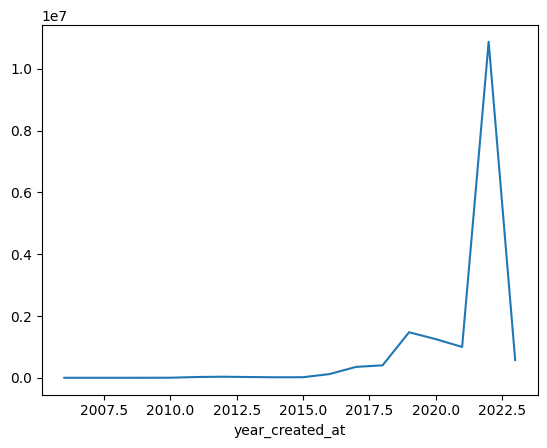

In [5]:
import matplotlib.pyplot as plt
s = a.abortion_tweets.groupby('year_created_at').size()
s.plot(x=s.index,y=s.values)
plt.show()


In [6]:
l = load_lynching_parquet()
l

LynchingData(lynching_conversations, lynching_tweets, lynching_tweet_hashtags, lynching_tweet_urls, lynching_tweet_mentions, lynching_matching_tweet_ids)

In [7]:
i = load_incel_parquet()
i

IncelData(incel_threads, incel_posts, incel_users, incel_quotes)